### Simple  Linear Regression

In [1]:
# Imports
import numpy as np
import tensorflow as tf

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


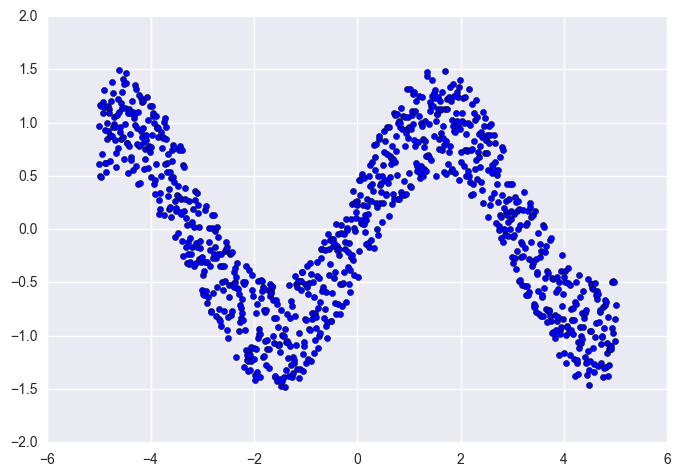

In [2]:
# Create toy data
n_obs = 1000
x = np.linspace(-5, 5, n_obs)
y = np.sin(x) + np.random.uniform(-0.5, 0.5, n_obs)
plt.scatter(x, y)

In [3]:
# Placeholders for input and output of the network
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

####  Optimize

$$Min_{W,b} ||(XW + b)-y||^2$$

#### Variable ( ) constructor 
- Requires an initial value for the variable, which can be a `Tensor` of any type and shape.  The initial value defines the
type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.

In [4]:
# Variables for W and b
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='b')
Y_pred = tf.add(tf.mul(X, W), b)
print W
print b
print Y_pred

Tensor("Add:0", dtype=float32)


In [5]:
# Calculate average data loss
cost = tf.reduce_sum(tf.pow(Y_pred - y, 2))/(n_obs - 1)
print cost

Tensor("div:0", dtype=float32)


In [6]:
# Total loss: data loss + regularization loss
loss = tf.add(cost, tf.mul(1e-3, tf.global_norm([W])))
print loss

Tensor("Add_1:0", dtype=float32)


In [7]:
# Gradient descent to optimize W, b
l_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=l_rate).minimize(cost)
print optimizer

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weight/ApplyGradientDescent"
input: "^GradientDescent/update_b/ApplyGradientDescent"



/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


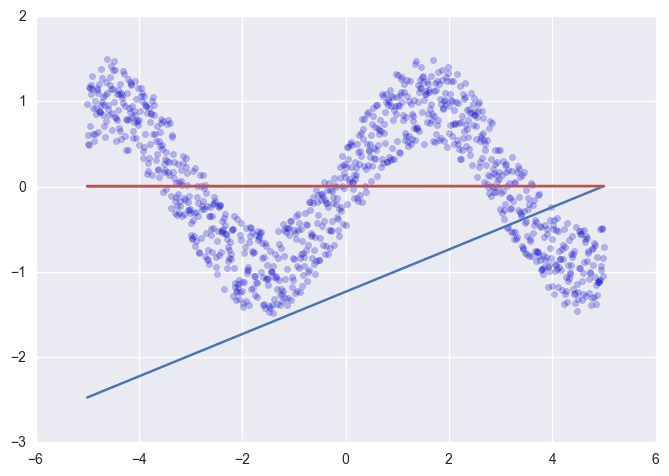

In [8]:
# Create a session to use the graph
n_epoch = 1000

# Plot data
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, alpha=0.25)

with tf.Session() as ses:
    # Initialize all variables
    ses.run(tf.initialize_all_variables())
    
    # Fit training data
    initial_cost = 0.0
    for epoch in range(n_epoch):
        for (x_, y_) in zip(x, y):
            ses.run(optimizer, feed_dict={X: x_, Y: y_})
        training_cost = ses.run(cost, feed_dict={X: x, Y: y})
        if epoch % 10 == 0:
            # NOTE: Need to change alpha!
            ax.plot(x, Y_pred.eval(feed_dict={X: x}, session=ses))
            fig.show() # Display the current figure
            plt.draw() # Re-draw the figure
            
        # Stop if criteria met 
        if np.abs(initial_cost - training_cost) < 1e-6:
            break
        initial_cost = training_cost